Input data:
tensor([[-2.1000, -3.2000],
        [-3.4000, -1.2000],
        [ 1.2000,  3.6000],
        [-0.1000,  0.8000]])
Corresponding classes:
tensor([0., 0., 1., 1.])


Weights x input:
tensor([-5.3000, -4.6000,  4.8000,  0.7000])
Individual log likelihoods:
tensor([-0.0050, -0.0100, -0.0082, -0.4032])
Total log likelihood:
-0.4263630211353302

Weights x input:
tensor([ -8.4320, -13.6120,   4.8360,  -0.3920])
Individual log likelihoods:
tensor([-2.1777e-04, -1.1921e-06, -7.9074e-03, -9.0823e-01])
Total log likelihood:
-0.9163598418235779

Weights x input:
tensor([-53., -46.,  48.,   7.])
Individual log likelihoods:
tensor([-0.0000, -0.0000, -0.0000, -0.0009])
Total log likelihood:
-0.0009114163694903255

The values are log-likelihoods - you would exponentiate to get back to probabilities.
The log of a probability (between 0 and 1) will be negative - the more negative, the lower the probability (think of the log graph).
Hence the third model is the most probable.
The orange line c

(-4.0, 4.0)

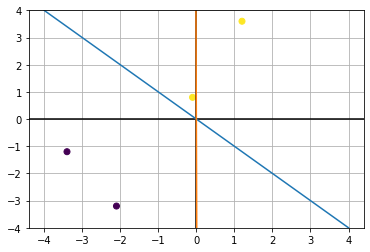

In [1]:
import torch as t
import matplotlib.pyplot as plt

# X = data input
# W = weights
# Y = corresponding data classes
def calculate_log_likelihood_given_weights(X, Y, W):
    # Input to logistic function
    input_weight_product = X@W
    print("\nWeights x input:\n{}".format(input_weight_product))

    # (Log) probability of each y given x.w - its input x multiplied by the weights (x.w -> logistic function -> P(y|logistic(x.w)))
    # [where y is assumed to come from a Bernoulli distribution - P(y=1|x) = p and P(y=0|x) = 1-p where p=logistic(x.w) (for each sample (x, y))]
    # This is the likelihood of y given x. Different weights fit the model (classification boundary) to the data differently, and so some will
    # give better likelihoods (the probability of data being assigned to the correct class) than others.
    individual_log_likelihoods = t.distributions.Bernoulli(logits=input_weight_product).log_prob(Y)
    print("Individual log likelihoods:\n{}".format(individual_log_likelihoods))

    # P(y|x) [all data] = P(y1|x1) * P(y2|x2) * P(y3|x3) * ... * P(yN|xN)
    # log P(y|x) = log (P(y1|x1) * P(y2|x2) * P(y3|x3) * ... * P(yN|xN))
    #            = log P(y1|x1) + log P(y2|x2) + log P(y3|x3) + ... + log P(yN|xN)
    # Sum the individual likelihoods to get the total likelihood.
    total_likelihood = individual_log_likelihoods.sum()
    print("Total log likelihood:\n{}".format(total_likelihood))

    return total_likelihood

X = t.tensor([[-2.1, -3.2], [-3.4, -1.2], [1.2, 3.6], [-0.1, 0.8]])
print("Input data:\n{}".format(X))
Y = t.tensor([0., 0., 1., 1.])
#Y = t.tensor([[0.], [0.], [1.], [1.]])
print("Corresponding classes:\n{}".format(Y))
print()

# Weights = [1, 1]
loglik_1 = calculate_log_likelihood_given_weights(X, Y, t.tensor([1., 1.]))
# Weights = [4, 0.01]
loglik_2 = calculate_log_likelihood_given_weights(X, Y, t.tensor([4., 0.01]))
# Weights = [10, 10]
loglik_3 = calculate_log_likelihood_given_weights(X, Y, t.tensor([10., 10.]))

print("\nThe values are log-likelihoods - you would exponentiate to get back to probabilities.\nThe log of a probability (between 0 and 1) will be negative - the more negative, the lower the probability (think of the log graph).\nHence the third model is the most probable.")
print("The orange line corresponds to model 2, the blue line to models 1 and 3.")

fig, ax = plt.subplots()
l = t.linspace(-4, 4, 1000)
ax.grid()
ax.axvline(0, color='black')
ax.axhline(0, color='black')
ax.scatter(X[:,0], X[:,1], c=Y)
ax.plot(l, -l)
ax.plot(l, -400*l)
ax.set_ylim(-4, 4)

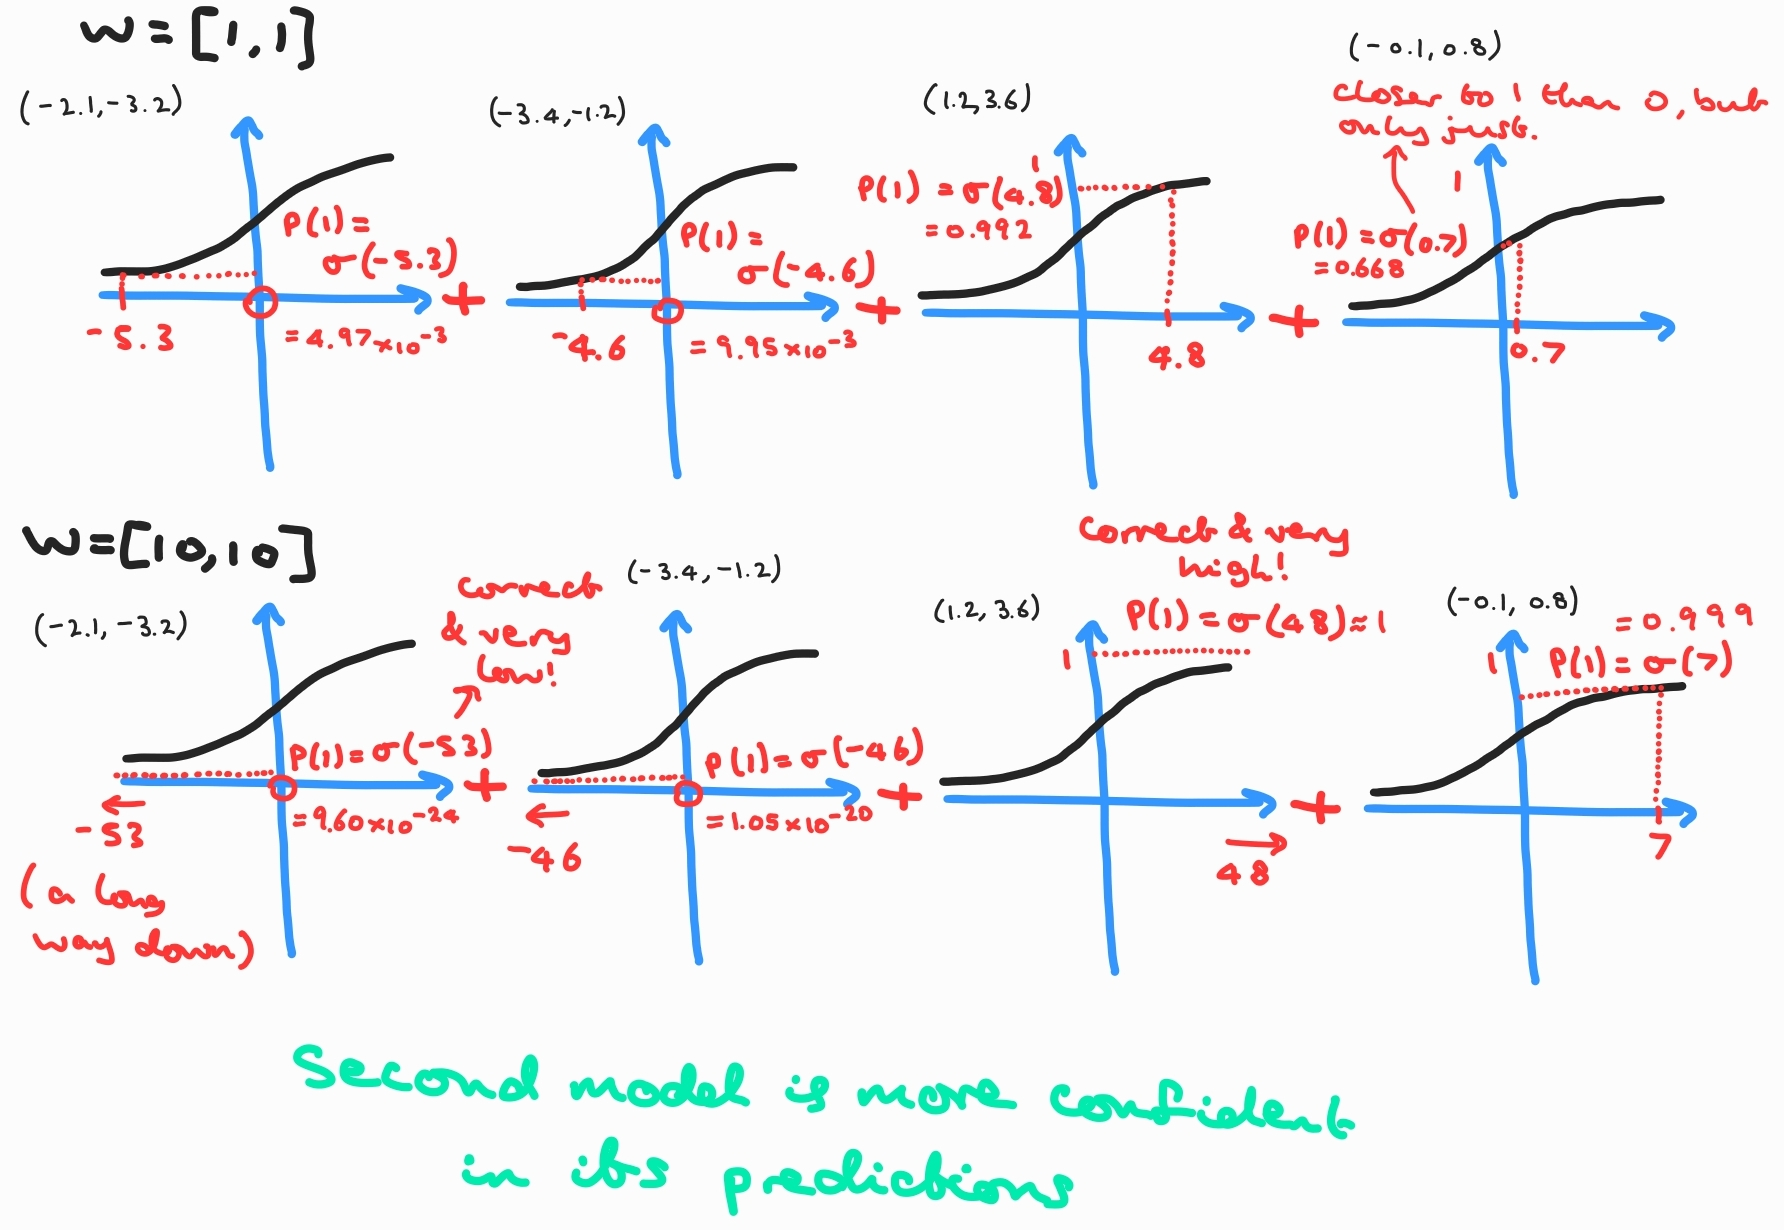

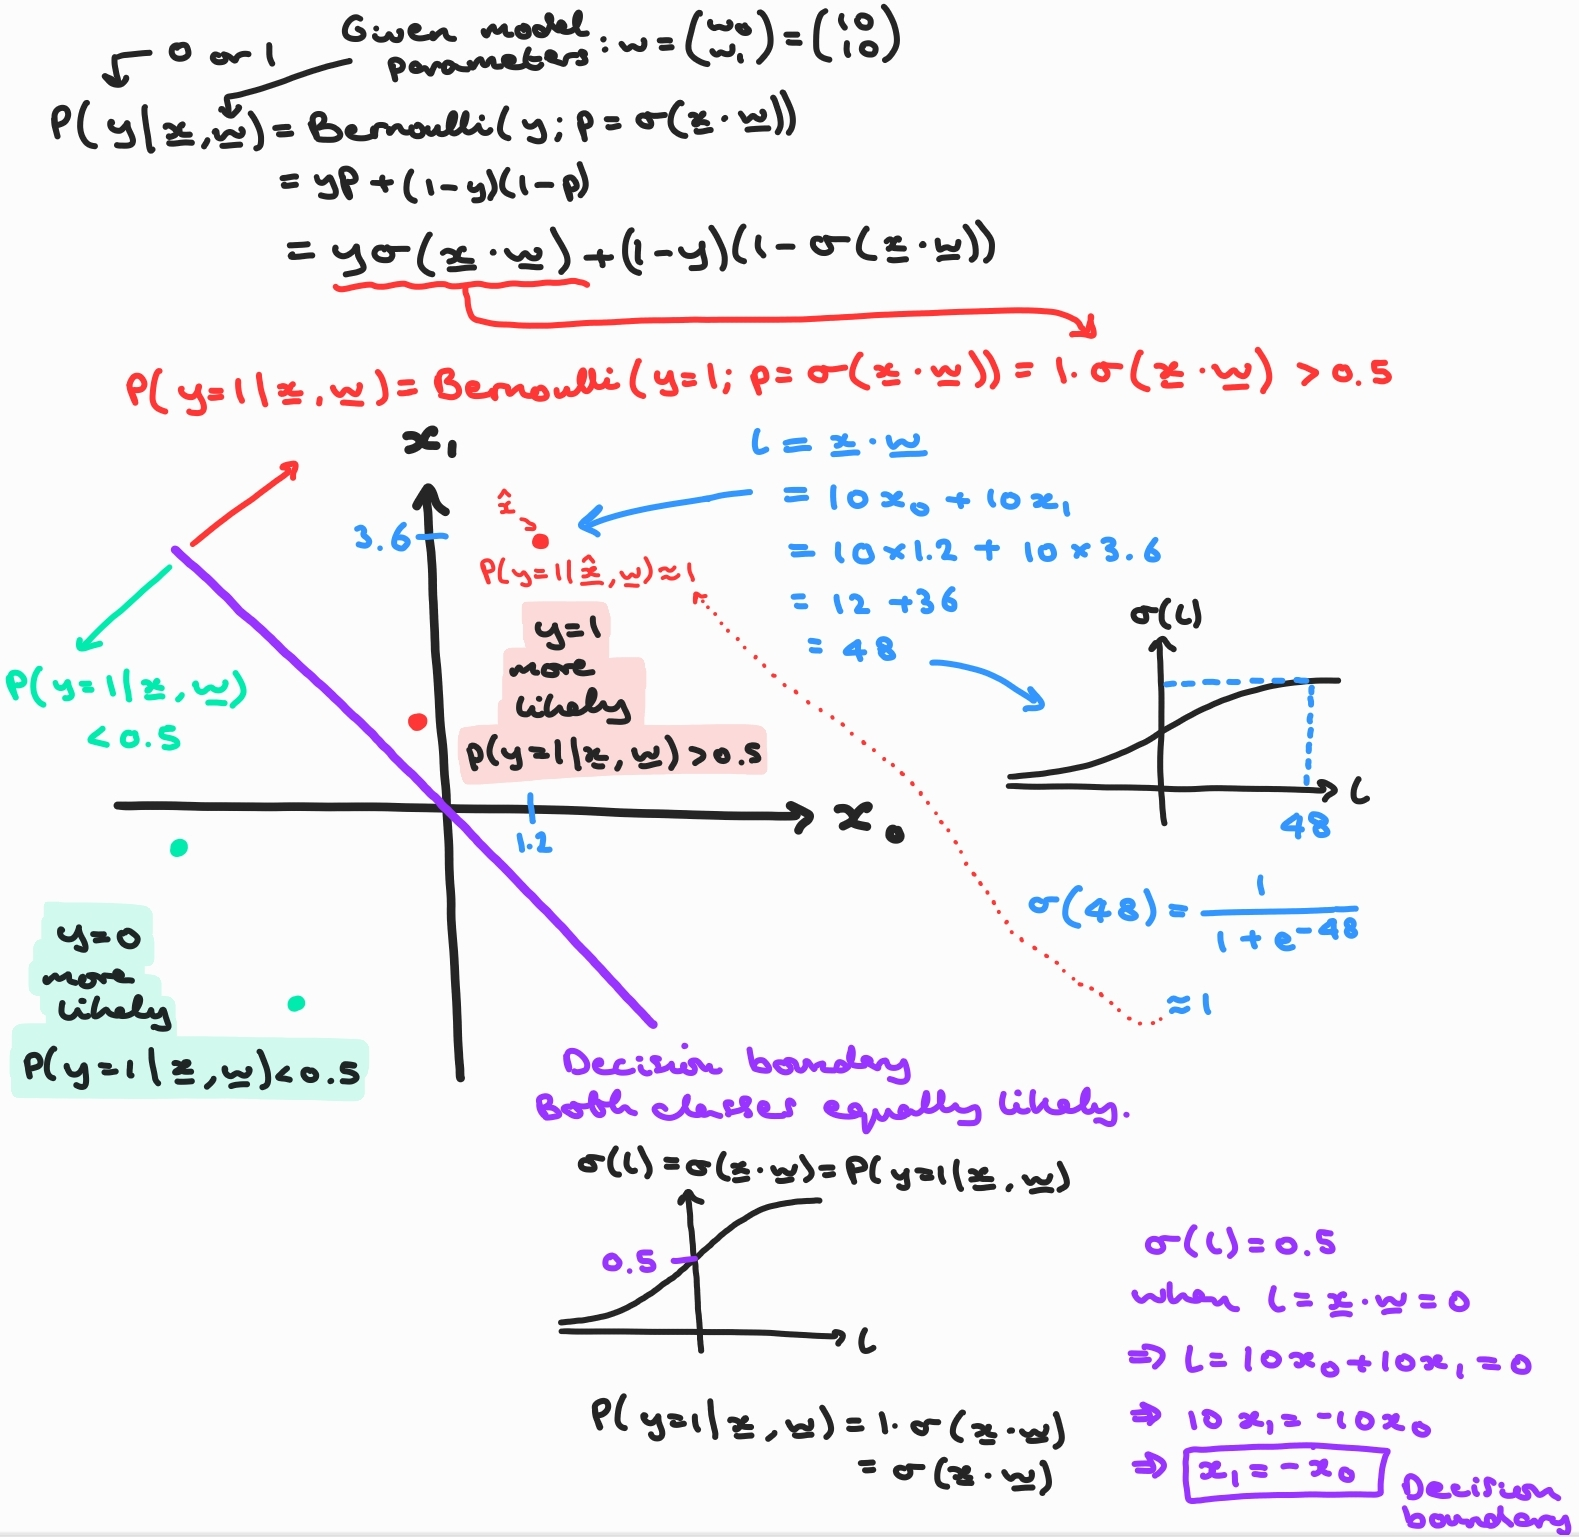

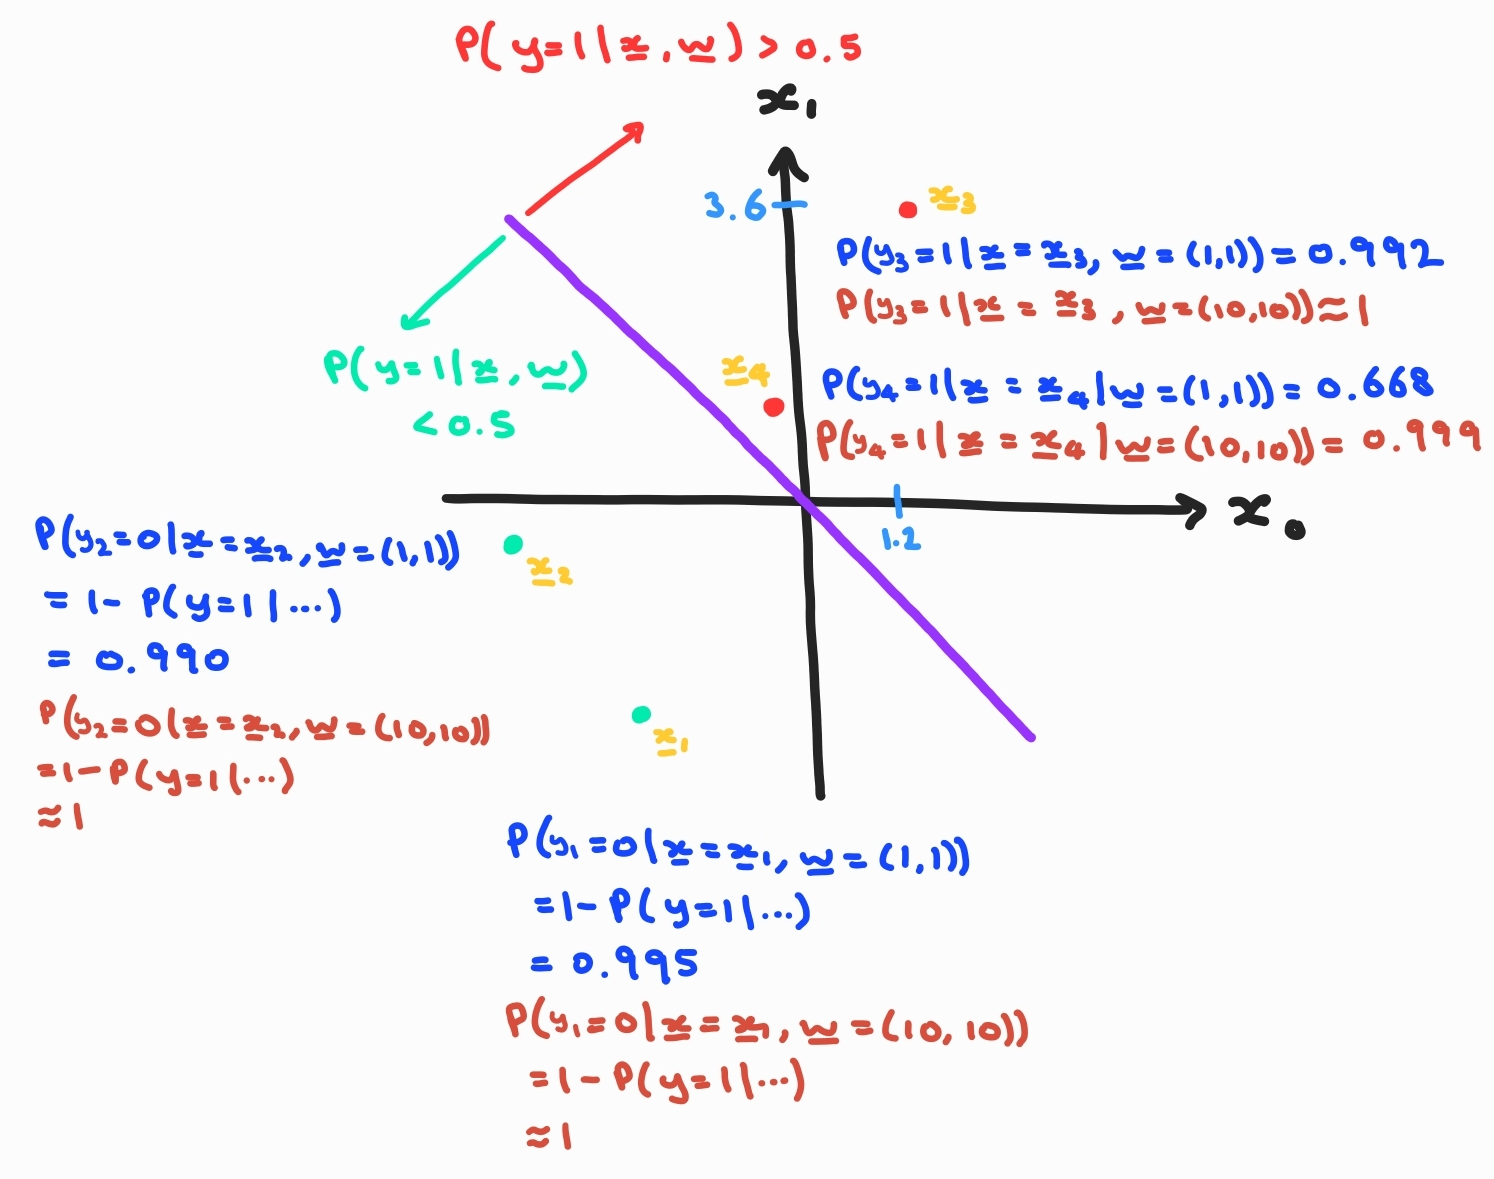

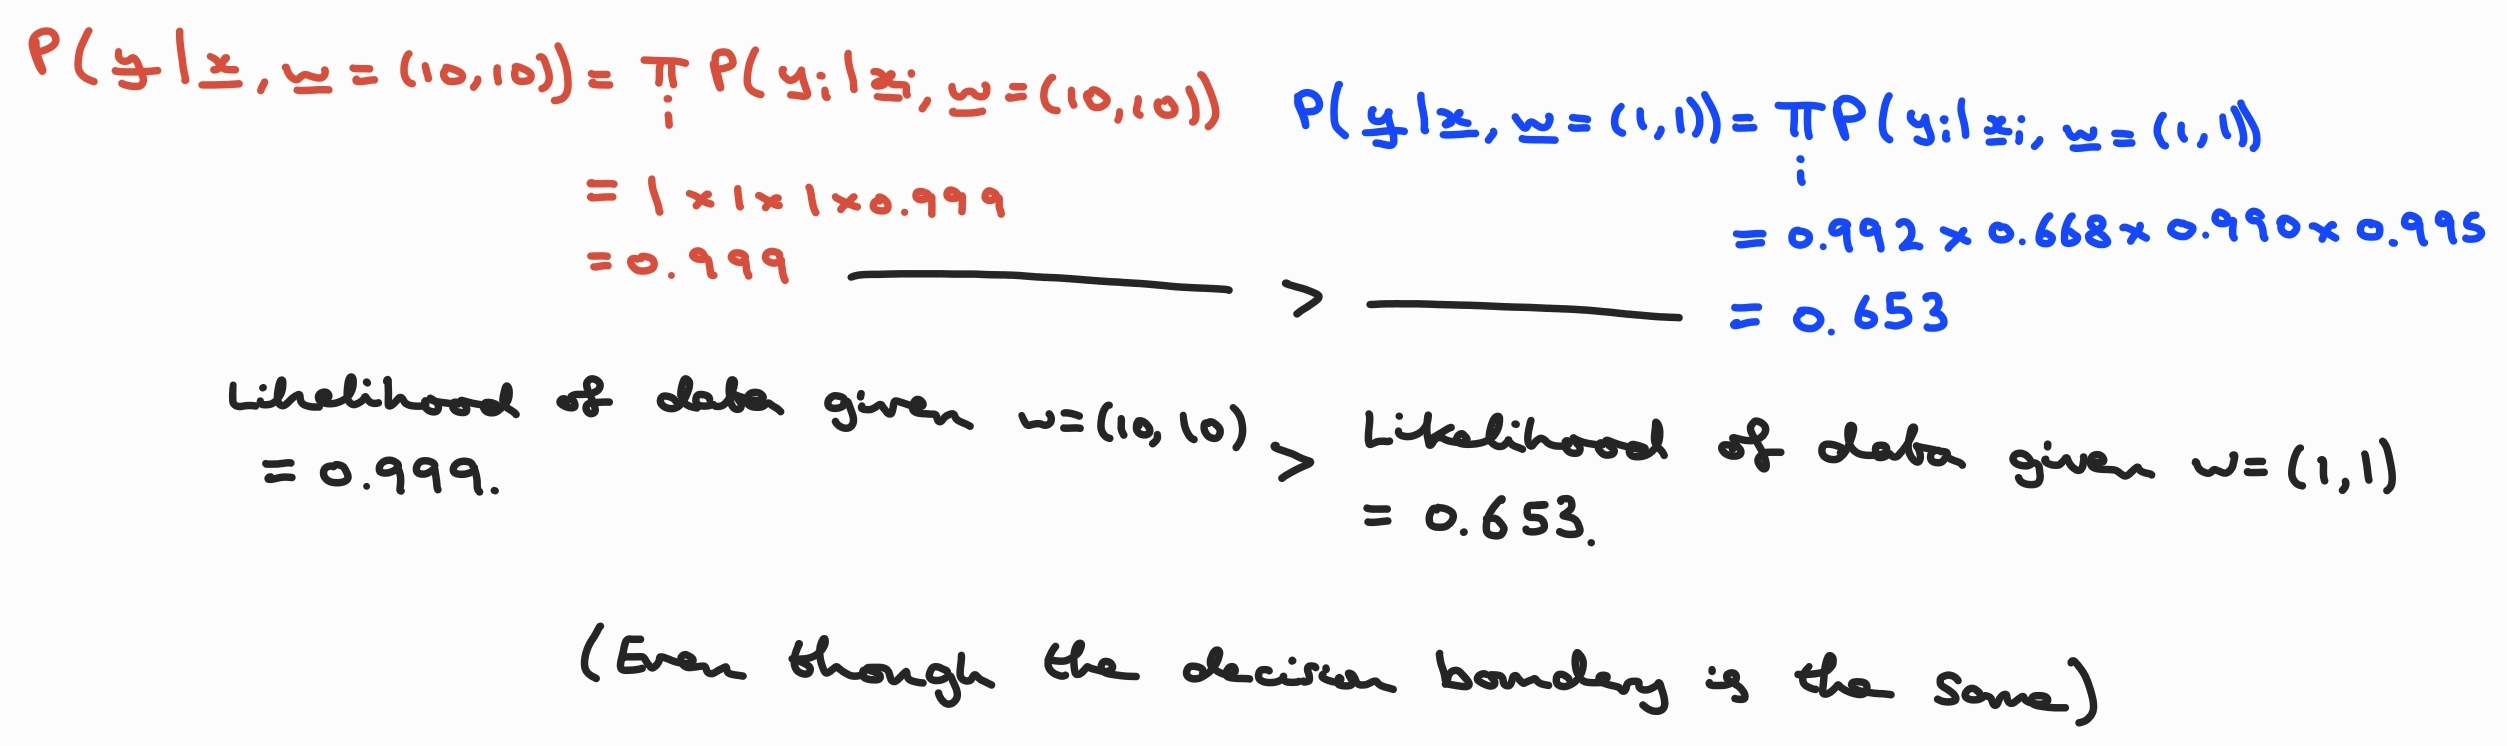

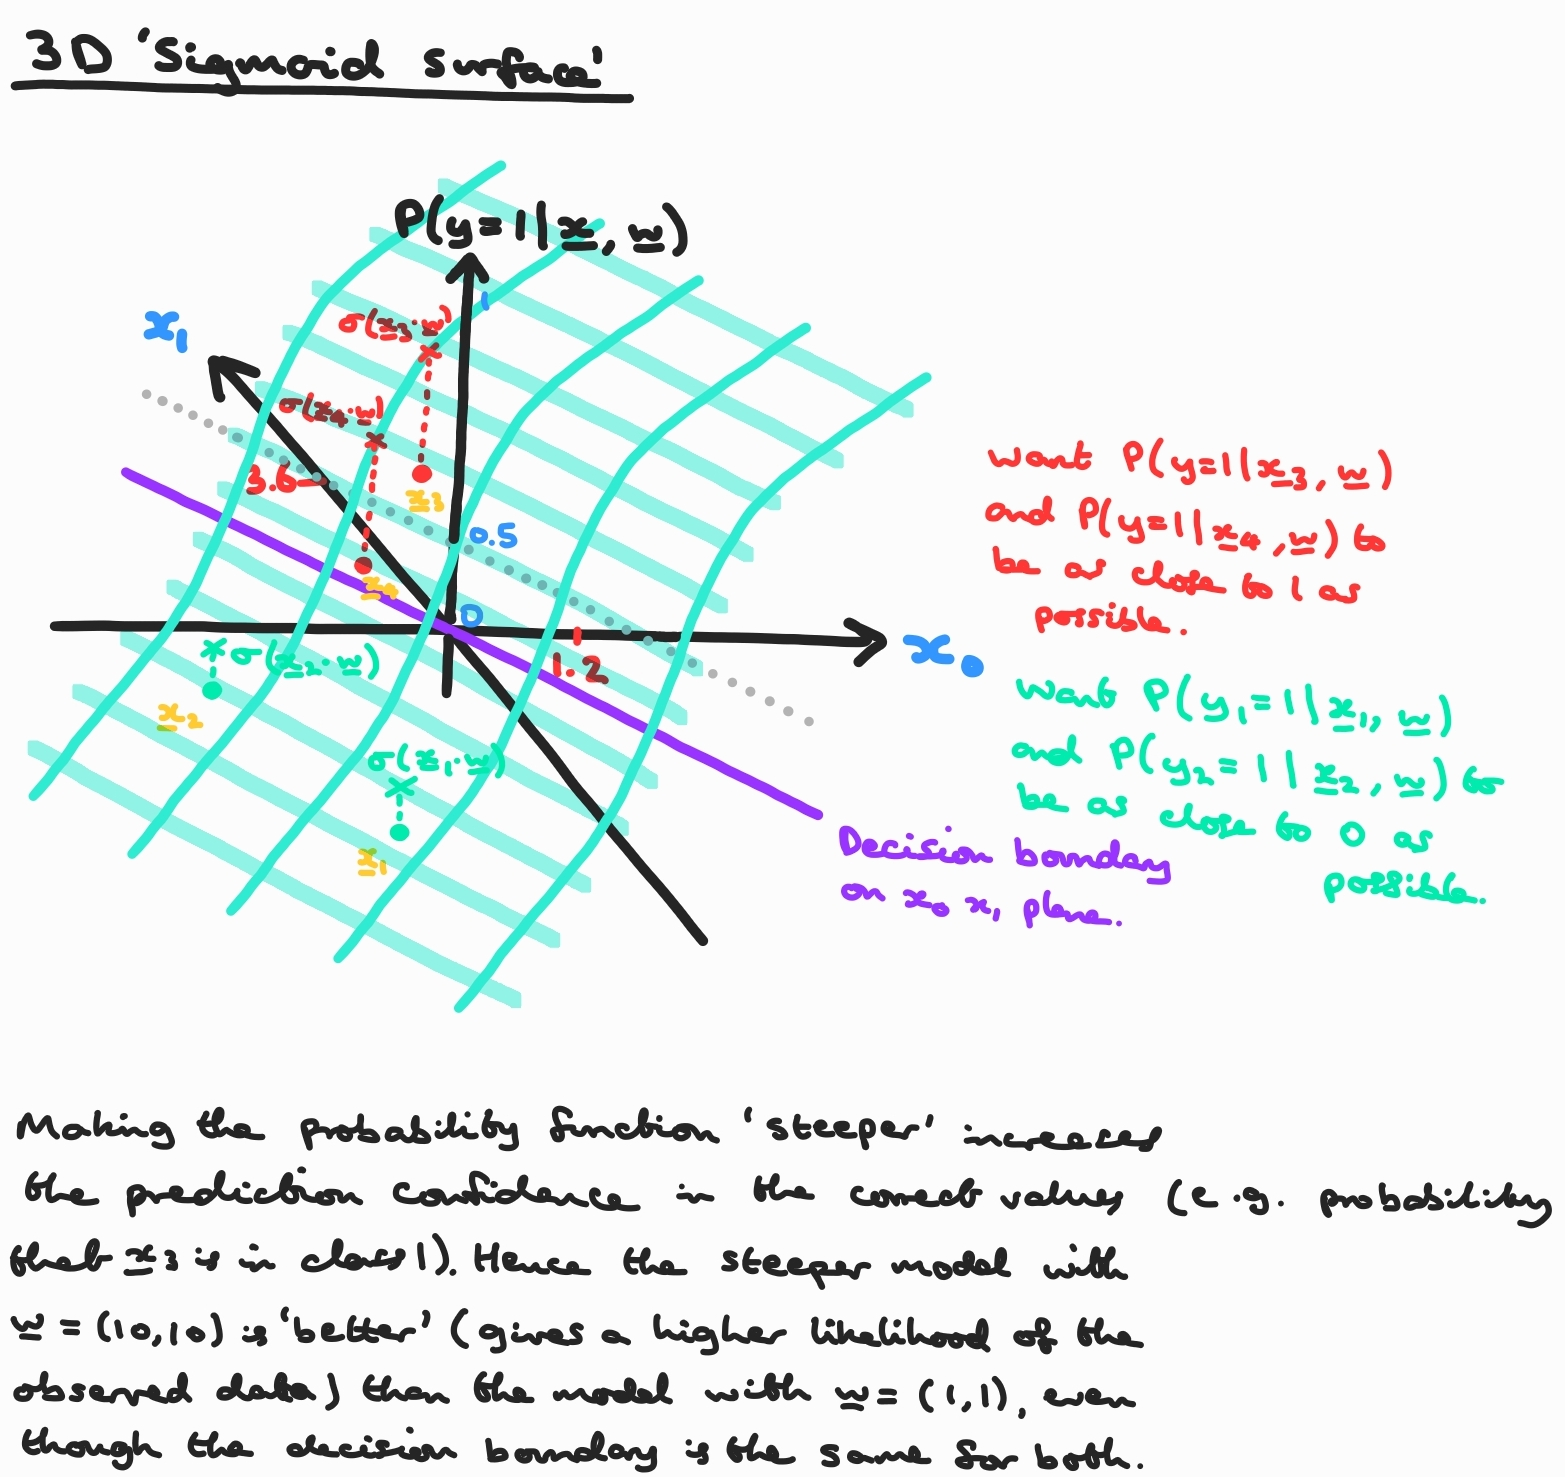